# 1. Import thư viện

In [71]:
import numpy as np 
import pandas as pd 

from collections import Counter
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import imblearn
from datasist.structdata import detect_outliers
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import matplotlib
from imblearn.pipeline import Pipeline 
import matplotlib.pyplot as plt
matplotlib.style.use('tableau-colorblind10')
import seaborn as sns
from plotnine import *
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# 2. Loading data

In [37]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Thông tin về kiểu dữ liệu từng cột của dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Xác định số lượng quan sát.

In [39]:
len(df['CLIENTNUM'].unique())

10127

Do trường CLIENTNUM chính là trường đặc trưng cho từng quan sát nên ta lấy len của trường này để ra số lượng quan sát.

In [43]:
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

Bỏ đi những cột không cần dùng để khai phá và xây dựng mô hình.

Thông tin các trường của dataset sau khi bỏ bớt cột.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# 3. Khai phá dữ liệu

In [45]:
cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


Chia data thành 2 loại: num_col là dữ liệu dạng số, cat_col là dữ liệu dạng phân loại.

Ma trận hệ số tương quan giữa các biến dữ liệu dạng số:

<Axes: >

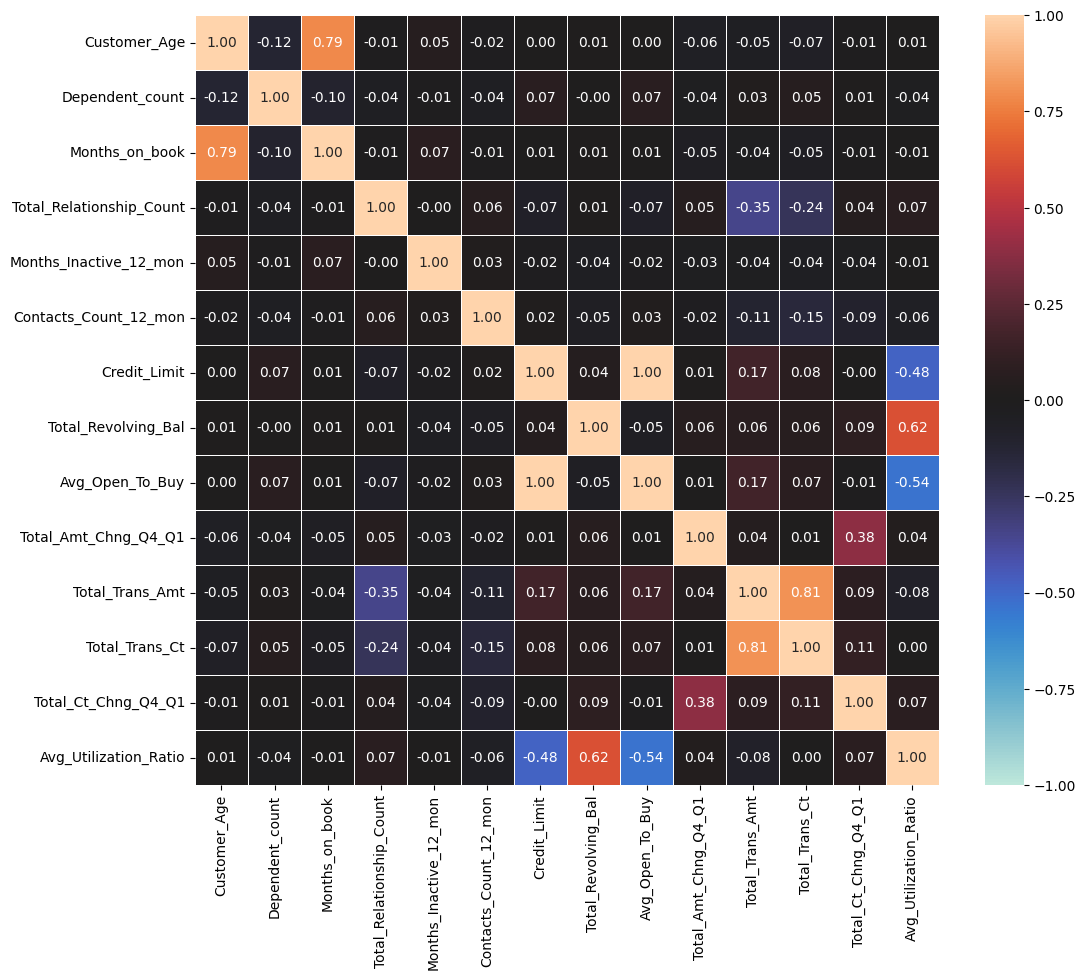

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_col].corr(), vmin=-1.0, vmax=1.0, linewidths=0.5, cmap='icefire', annot=True, fmt='.2f')

# 4. Chuẩn bị dữ liệu (Data Preprocessing)
Xử lý dữ liệu thô.

## 4.1. Xử lý Missing data

In [47]:
# kiểm tra data bị missing
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Tập dữ liệu không có missing value.

## 4.2. Xử lý các giá trị ngoại lai (Outliers)

- Giá trị ngoại lai (Outliers) trong dữ liệu là gì?

Dữ liệu ngoại lai là những giá trị dữ liệu (records) được ghi nhận có sự khác biệt bất thường so với nhứng giá trị dữ liệu khác, không theo một quy tắc chung nào và có thể gây ra sự sai lệch trong kết quả phân tích và việc này có thể gây ra sự sai lệch trong kết quả phân tích và việc xây dựng mô hình dự đoán.
- Làm thế nào để xác định và xử lý các giá trị ngoại lai (Outliers)?

Nhóm sử dụng phương pháp khoảng tứ phân vị **(IQR)** để xác định các giá trị ngoại lai. Tuy nhiên, nhóm không tiến hành code từ đầu để xác định từng giá trị ngoại lai mà sử dụng hàm **'detect_outliers'** từ thư viện 'datasist.structdata', hàm này sử dụng phương pháp IQR để xác định Outliers và trả về hàng mà Outliers được xác định.

Để hiểu rõ hơn:
 - Về phương pháp IQR: <https://tiensu.github.io/blog/77_data_prepeation_for_ml_data_cleaning_outlier/>
 - Về hàm 'detect_outliers': <https://risenw.github.io/datasist/structdata.html>

In [53]:
# phát hiện các giá trị ngoại lai bằng hàm detect_outliers
outliers_indices = detect_outliers(df, features=num_col, n=1.5)
number_of_outliers = len(outliers_indices)

# in ra số lượng giá trị ngoại lai
print(f'Số giá trị ngoại lai: {number_of_outliers}')
print('Danh sách dòng chứa các giá trị ngoại lai: ',outliers_indices)

Số giá trị ngoại lai: 1274
Danh sách dòng chứa các giá trị ngoại lai:  [251, 254, 11, 18, 39, 52, 108, 151, 177, 182, 208, 311, 317, 358, 388, 432, 617, 659, 1013, 1098, 1118, 1248, 1327, 1599, 1748, 1789, 1830, 1883, 1927, 1970, 1990, 2099, 2104, 2120, 2152, 2170, 2180, 2214, 2236, 2265, 2333, 2348, 2377, 2379, 2451, 2483, 2574, 2609, 2617, 2627, 2693, 2729, 2735, 2749, 2896, 2955, 2956, 2966, 2977, 3152, 3252, 3332, 3418, 3682, 3732, 3747, 3764, 3935, 4511, 4768, 4890, 5009, 5044, 5049, 5092, 5163, 5362, 6049, 6119, 6806, 7065, 8411, 8788, 8822, 9093, 9128, 9150, 9313, 9467, 9502, 9504, 9594, 9625, 9626, 9631, 9638, 9640, 9667, 9727, 9736, 9772, 9773, 9817, 9818, 9838, 9850, 9873, 9894, 9898, 9915, 9919, 9926, 9929, 9934, 10028, 10042, 10062, 10069, 10107, 10114, 12, 29, 31, 118, 202, 313, 373, 404, 564, 592, 749, 817, 1479, 1646, 1794, 2255, 2619, 2671, 2846, 3205, 3311, 3392, 3643, 4032, 4465, 4621, 4749, 4799, 5020, 5085, 5164, 5249, 5256, 5762, 5971, 6083, 6343, 6561, 6818, 6847,

In [54]:
# xoá bỏ các giá trị ngoại lệ
df = df.drop(outliers_indices)
print(f"Số chiều của dataset sau khi bỏ outliers: {df.shape}")

Số chiều của dataset sau khi bỏ outliers: (8853, 20)


Sau khi tìm và xử lý các giá trị ngoại lại, tệp dữ liệu của nhóm còn 20 trường với 8853 records.

## 4.3. Xử lý dữ liệu phân loại (Categorical data)
- Dữ liệu phân loại là gì?

Dữ liệu phân loại, không giống với dữ liệu dạng số (numerical data), là loại dữ liệu chỉ nhận một số lượng hữu hạn các giá trị cố định. Ví dụ trong một dataset về user, giới tính là một feature dạng categorical ví nó chỉ nhận 1 trong 2 giá trị: Nam hoặc Nữ. Như trong dataset nhóm lựa chọn, dữ liệu về tình trạng hôn nhân của khách hàng sẽ là cateegorical feature vì nó nhận giá trị như độc thân, đã kết hôn hay đã ly hôn. Các dữ liệu dạng phân loại thường được biểu diễn dưới dạng text.

- Categorical data thường được chia làm 2 loại: nominal và ordinal data:

- - **Nominal data** (dữ liệu dạng định danh): dữ liệu được label hoàn toàn không theo một thứ tự hay thứ bậc trước sau nào. Ví dụ Nam/ Nữ - thời tiết nắng/ mưa/ nhiều mây/ - tên các nước, các thành phố, vv. Trong dataset nhóm lựa chọn, nominal data là 'Gender' và "Marital Status'.
- - **Ordinal data** (dữ liệu dạng thứ bậc): ngược với nominal data, là dữ liệu được sắp xếp/ phân loại theo một thứ tự nhất đinh. Ví dụ tình hình kinh tế tốt/ trung bình/ xấu - kích cỡ quần áo XS/ S/ M/ L/ XL, vv. Trong dataset nhóm lựa chọn, ordinal data bao gồm 'Attrition Flag', 'Education Level', 'Income Category' và 'Card Category'.

In [55]:
# xử lý dữ liệu dạng thứ bậc bằng cách map số thứ tự cho từng thứ bậc với data tương ứng

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,M,2,5,Married,2,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,0,48,M,2,5,Single,4,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,0,42,M,5,1,Unknown,5,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,0,35,M,3,5,Unknown,3,0,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
14,0,57,F,2,5,Married,1,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


In [56]:
# sử dụng one-hot encoding để xử lý dữ liệu không có thứ bậc
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


24 total features after one-hot encoding.


Nhóm lựa chọn Mã hóa one-hot cho dữ liệu định tính không có thứ tự.
Cách truyền thống nhất để đưa dữ liệu hạng mục về dạng số là mã hóa one-hot. Trong cách mã hóa này, một “từ điển” được xây dựng chứa tất cả các giá trị khả dĩ của từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.

In [57]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,44,2,5,2,0,36,3,1,2,...,1088,24,0.846,0.311,False,True,False,True,False,False
9,0,48,2,5,4,0,36,6,3,3,...,1441,32,0.882,0.144,False,True,False,False,True,False
10,0,42,5,1,5,0,31,5,3,2,...,1201,42,0.680,0.217,False,True,False,False,False,True
13,0,35,3,5,3,0,30,5,1,3,...,1311,33,2.000,0.195,False,True,False,False,False,True
14,0,57,2,5,1,0,48,5,2,2,...,1570,29,0.611,0.279,True,False,False,True,False,False


## 4.4. Chia dữ liệu thành tập Train và tập Test
Chúng ta sẽ sử dụng thư viện `train_test_split()` để chia dữ liệu thành 2 tập: train và test. Nhóm lựa chọn tỷ lệ tập train:test là 80:20.

### Tách các biến dự đoán và biến mục tiêu

In [58]:
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [59]:
x.shape, y.shape

((8853, 23), (8853,))

### Chia dữ liệu thành 2 tập

In [61]:
# chia dữ liệu thành 2 tập: Train và Test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# hiển thị kết quả mẫu cho từng tập
print("Tập huấn luyện mô hình có {} quan sát.".format(X_train.shape[0]))
print("Tập kiểm tra mô hình có {} quan sát.".format(X_test.shape[0]))

Tập huấn luyện mô hình có 7082 quan sát.
Tập kiểm tra mô hình có 1771 quan sát.


## 4.5. Xử lý dữ liệu mất cân bằng

In [62]:
y_train.value_counts()

Attrition_Flag
0    5940
1    1142
Name: count, dtype: int64

Dữ liệu bị mất cân bằng nên nhóm sử dụng **SMOTE** để cân bằng dữ liệu vì việc lấy mẫu có thể gây mất dữ liệu và ảnh hưởng đến chất lượng dự đoán khi dữ liệu ban đầu bị mất cân bằng.
- **SMOTE** (Synthetic Minority Over-sampling) là phương pháp sinh mẫu (thuộc phương pháp **Over Sampling**) nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Để gia tăng kích thước mẫu, với mỗi một mẫu thuộc nhóm thiểu số ta sẽ lựa chọn ra mẫu láng giềng gần nhất với nó và sau đó thực hiện tổ hợp tuyến tính để tạo ra mẫu giả lập. Phương pháp để lựa chọn ra các láng giềng của một quan sát có thể dựa trên thuật toán kNN hoặc SVM.

In [63]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [64]:
y_train.value_counts()

Attrition_Flag
1    5940
0    5940
Name: count, dtype: int64

Bây giờ dữ liệu đã cân bằng.

## 4.6. Chuẩn hoá dữ liệu (Feature Scaling)
**Feature Scaling** (hay còn gọi là Data Normalization) là một kỹ thuật được sử dụng để chuẩn hoá dữ liệu về cùng phạm vi (same range).

Chuẩn hoá dữ liệu tuần tự với **StandardScaler**.

In [102]:
# tạo hàm StandardScaler
scaler = StandardScaler()

# sử dụng hàm vào tệp dữ liệu train
scaler.fit(X_train[num_col])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[num_col])
X_test_cont_scaled = scaler.transform(X_test[num_col])

# Replacing the scaled continuous features in the original data
X_train[num_col] = X_train_cont_scaled
X_test[num_col] = X_test_cont_scaled

X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.931732,-0.163926,3,1,0,1.154546,-0.331522,0.751478,0.479457,-0.867929,...,-0.307218,-0.379144,-0.212054,-0.887260,True,False,False,True,False,False
1,-0.708602,0.664771,4,5,0,-0.933402,1.665344,-1.539401,0.479457,-0.469235,...,0.408667,1.045911,-0.307518,1.660662,False,True,True,False,False,False
2,-2.075548,-0.992623,4,1,1,0.040974,1.665344,0.751478,2.467920,1.282810,...,1.356445,0.632186,-0.078405,-0.887260,False,True,False,False,True,False
3,1.205121,-0.163926,3,1,0,1.015350,0.999722,-0.393962,-1.509006,-0.716591,...,0.296976,0.770094,-0.274106,1.234825,True,False,True,False,False,False
4,-0.708602,0.664771,5,2,0,-0.933402,0.999722,-1.539401,0.479457,-0.767367,...,-0.228503,0.080551,1.081478,1.025456,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,0.384954,-0.163926,5,1,0,0.319367,0.999722,-0.393962,-0.514774,-0.725733,...,-1.056080,-1.712261,0.803073,-0.887260,True,False,False,True,True,False
11876,-0.435213,0.664771,5,1,0,0.040974,-1.662767,-0.393962,1.473689,-0.861658,...,-0.614280,-0.654961,-0.985870,-0.887260,True,False,False,True,True,False
11877,-0.298519,0.664771,1,5,0,0.040974,-0.997145,0.751478,-0.514774,-0.145223,...,-0.372460,-0.471083,-1.665567,-0.576274,False,True,False,True,True,False
11878,2.025289,-0.992623,2,2,0,1.432940,-0.997145,0.751478,-0.514774,0.329941,...,0.541278,0.632186,-0.047446,0.234086,True,True,False,False,True,False


# 5. Huấn luyện mô hình và đánh giá mô hình
Nhóm sẽ lựa chọn sử dụng 5 mô hình cho để huẩn luyện cho dataset này sau đó đánh giá độ chính xác của từng mô hình với biến dự đoán để chọn ra mô hình tốt nhất cho bài toán dự đoán khách hàng rời bỏ dịch vụ thẻ tín dụng của ngân hàng.
5 mô hình nhóm lựa chọn bao gồm:
- **Hồi quy tuyến tính đa biến (Linear Regression)**
- **Hồi quy đa thức bậc 2 (Polynomial Regression)**
- **Hồi quy Logistic (Logistic Regression)**
- **K-Nearest Neighbors (KNN)**
- **Cây quyết định (Decision Tree)**

In [92]:
# danh sách các mô hình hồi quy
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": PolynomialFeatures(degree=2)
}

## 5.1. Huấn luyện mô hình
### Hồi quy tuyến tính đa biến (Linear Regression)
Mô hình hồi quy tuyến tính chỉ sử dụng được cho các dữ liệu dạng số mà nhóm hướng đến sử dụng cả những dữ liệu phân loại (thường là dạng text), cho nên mô hình này là không phù hợp. Nhóm sẽ không sử dụng mô hình này cho tập data đã chọn.

In [90]:
lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: Linear Regression')
print(f'Training Accuracy: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Có thể thấy lỗi này xuất hiện khi cố gắng sử dụng mô hình hồi quy tuyến tính cho dữ liệu phân loại không có thứ bậc đã được chuyển về dạng mã nhị phân (True/False) ví dụ như 'Gender' và 'Marital Status'.

Loại bỏ mô hình hồi quy tuyến tính đa biến khỏi danh sách mô hình:

In [93]:
classifiers.pop('Linear Regression')
print(classifiers)

{'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Polynomial Regression': PolynomialFeatures()}


### Hồi quy đa thức bậc 2 (Polynomial Regression)

Nhóm tạo một mô hình Polynom2

In [96]:
pr=PolynomialFeatures(degree=2)
X_pr=pr.fit_transform(X_train)

In [97]:
X_train.shape

(11880, 23)

Kích thước ban đầu của bộ dữ liệu bao gồm 23 features và 11880 samples dữ liệu.

In [98]:
X_pr.shape

(11880, 300)

Sau khi biến đổi, của bộ dữ liệu mới bao gồm 300 features và 11880 samples dữ liệu.

Sau đó, tạo một linear regression object để huấn luyện mô hình sử dụng bộ data được biến đổi.

In [95]:
model=LinearRegression()
model.fit(X_pr,y_train)
y_pred = lr.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: Polynomial Regression')
print(f'Training Accuracy: {accuracy_score(y_train, lr.predict(X_pr))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Mô hình hồi quy đa thức bậc 2 sẽ biến đổi tập dữ liệu rồi huấn luyện mô hình bằng **Linear Regression** mà Linear Regression chỉ sử dụng được cho các dữ liệu dạng số mà nhóm hướng đến sử dụng cả những dữ liệu phân loại (thường là dạng text), cho nên mô hình này là không phù hợp. Nhóm sẽ không sử dụng mô hình này cho tập data đã chọn. Khi sử dụng **Polynom2** thì nhóm gặp phải lỗi như khi sử dụng **Linear Regression**.

Loại bỏ mô hình hồi quy đa thức bậc 2 khỏi danh sách mô hình:

In [100]:
classifiers.pop('Polynomial Regression')
print(classifiers)

{'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'K-Nearest Neighbors': KNeighborsClassifier()}


### Hồi quy Logistic (Logistic Regression)

Hồi quy logistic là một trong những thuật toán Machine Learning đơn giản và được sử dụng phổ biến nhất cho các bài toán phân loạn 2 lớp. Nó rất dễ thực hiện và có thể được sử dụng làm mô hình cơ sở cho bất kỳ bài toán phân loại nhị phân nào.

Hồi quy logistic có thể được sử dụng cho các vấn đề phân loại khác nhau như phát hiện thư rác, dự đoán bệnh, dự đoán khách hàng rời bỏ, dự đoạn xác suất sử dụng dịch vụ của khách hàng.

In [106]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: Logistic Regression')
print(f'Training Accuracy: {accuracy_score(y_train, logreg.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

Mô hình: Logistic Regression
Training Accuracy: 0.9190235690235691
Testing Accuracy: 0.8797289666854884
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1372  136]
 [  77  186]]
------------------------------------------------------------------
Testing Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1508
           1       0.58      0.71      0.64       263

    accuracy                           0.88      1771
   macro avg       0.76      0.81      0.78      1771
weighted avg       0.89      0.88      0.88      1771

------------------------------------------------------------------


Độ chính xác của mô hình với tập huấn luyện là: 91.902%

Độ chính xác của mô hình với tập kiểm tra là: 87.973%

**Precision**: có nghĩa là độ chính xác, tức là mô hình chính xác đến mức nào. Nói cách khác, khi một mô hình đưa ra dự đoán, mức độ thường xuyên dự đoán đó đúng. Trong bài toán này, khi mô hình Hồi quy Logistic dự đoán khách hàng sẽ rời bỏ dịch vụ, thì có tới 58% trường hợp dự đoán chính xác là sẽ rời bỏ dịch vụ.

**Recall**: Mô hình chỉ có thể dự đoán chính xác được 71% số khách hàng rời bỏ dịch vụ trong bộ data set. Còn 30% còn lại mô hình dự đoán sai khi dự đoán khách hàng vẫn tiếp tục dịch vụ, nhưng thực tế số liệu ghi nhận trong tập test cho rằng khách hàng không còn dùng dịch vụ.

**F1 Score** là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh giá độ chính xác trên đồng thời precision và recall. Nhóm sẽ dựa chủ yếu là **F1 score** để lụa chọn mô hình phù hợp nhất cho bài toán. Hồi quy Logistic có F1 score là 88%.

Từ các khía cạnh trên, có thể đánh giá mô hình Hồi quy Logistic dự đoán khá tốt khách hàng có rời bỏ dịch vụ thẻ tín dụng của ngân hàng hay không.

### K-Nearest Neighbors (KNN)
Thuật toán **KNN** cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm k điểm gần với dữ liệu cần kiểm tra nhất. Việc tìm khoảng cách giữa 2 điểm củng có nhiều công thức có thể sử dụng, tùy trường hợp mà chúng ta lựa chọn cho phù hợp. 

Đây là 3 cách cơ bản để tính khoảng cách 2 điểm dữ liệu x, y có k thuộc tính:

![!](\Users\Admin\1.png)

In [107]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: K-Nearest Neighbors')
print(f'Training Accuracy: {accuracy_score(y_train, knn.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

Mô hình: K-Nearest Neighbors
Training Accuracy: 0.9618686868686869
Testing Accuracy: 0.88085827216262
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1349  159]
 [  52  211]]
------------------------------------------------------------------
Testing Classification report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1508
           1       0.57      0.80      0.67       263

    accuracy                           0.88      1771
   macro avg       0.77      0.85      0.80      1771
weighted avg       0.90      0.88      0.89      1771

------------------------------------------------------------------


Độ chính xác của mô hình với tập huấn luyện là: 96.187%

Độ chính xác của mô hình với tập kiểm tra là: 88.086%

**Precision**: có nghĩa là độ chính xác, tức là mô hình chính xác đến mức nào. Nói cách khác, khi một mô hình đưa ra dự đoán, mức độ thường xuyên dự đoán đó đúng. Trong bài toán này, khi mô hình Hồi quy Logistic dự đoán khách hàng sẽ rời bỏ dịch vụ, thì có tới 57% trường hợp dự đoán chính xác là sẽ rời bỏ dịch vụ.

**Recall**: Mô hình chỉ có thể dự đoán chính xác được 80% số khách hàng rời bỏ dịch vụ trong bộ data set. Còn 20% còn lại mô hình dự đoán sai khi dự đoán khách hàng vẫn tiếp tục dịch vụ, nhưng thực tế số liệu ghi nhận trong tập test cho rằng khách hàng không còn dùng dịch vụ.

**F1 Score** là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh giá độ chính xác trên đồng thời precision và recall. Mô hình K-Nearest Neighbors có F1 score là 88%.

Từ các khía cạnh trên, có thể đánh giá mô hình **K-Nearest Neighbors** dự đoán khá tốt (tốt hơn Hồi quy Logistic) khách hàng có rời bỏ dịch vụ thẻ tín dụng của ngân hàng hay không.

### Cây quyết định (Decision Tree)

Mô hình **cây quyết định** là một mô hình được sử dụng khá phổ biến và hiệu quả trong cả hai lớp bài toán phân loại và dự báo của học có giám sát. Khác với những thuật toán khác trong học có giám sát, mô hình cây quyết định không tồn tại phương trình dự báo. Mọi việc chúng ta cần thực hiện đó là tìm ra một cây quyết định dự báo tốt trên tập huấn luyện và sử dụng cây quyết định này dự báo trên tập kiểm tra.

![!](\Users\Admin\2.png)

In [108]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)

f1 = f1_score(y_test, y_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print('Mô hình: K-Nearest Neighbors')
print(f'Training Accuracy: {accuracy_score(y_train, dtc.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

Mô hình: K-Nearest Neighbors
Training Accuracy: 1.0
Testing Accuracy: 0.9384528514963297
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1442   66]
 [  43  220]]
------------------------------------------------------------------
Testing Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1508
           1       0.77      0.84      0.80       263

    accuracy                           0.94      1771
   macro avg       0.87      0.90      0.88      1771
weighted avg       0.94      0.94      0.94      1771

------------------------------------------------------------------


Độ chính xác của mô hình với tập huấn luyện là: 100%

Độ chính xác của mô hình với tập kiểm tra là: 93.845%

**Precision**: có nghĩa là độ chính xác, tức là mô hình chính xác đến mức nào. Nói cách khác, khi một mô hình đưa ra dự đoán, mức độ thường xuyên dự đoán đó đúng. Trong bài toán này, khi mô hình Hồi quy Logistic dự đoán khách hàng sẽ rời bỏ dịch vụ, thì có tới 77% trường hợp dự đoán chính xác là sẽ rời bỏ dịch vụ.

**Recall**: Mô hình chỉ có thể dự đoán chính xác được 84% số khách hàng rời bỏ dịch vụ trong bộ data set. Còn 16% còn lại mô hình dự đoán sai khi dự đoán khách hàng vẫn tiếp tục dịch vụ, nhưng thực tế số liệu ghi nhận trong tập test cho rằng khách hàng không còn dùng dịch vụ.

**F1 Score** là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh giá độ chính xác trên đồng thời precision và recall. Mô hình **Cây quyết định (Decision Tree)** có F1 score là 94%.

Từ các khía cạnh trên, có thể đánh giá mô hình **Decision Tree** dự đoán tốt (tốt hơn Hồi quy Logistic và K-Nearest Neighbors) khách hàng có rời bỏ dịch vụ thẻ tín dụng của ngân hàng hay không.

## 5.2. So sánh các mô hình


C:\Users\Admin\AppData\Local\Temp\ipykernel_5864\109583536.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Text(0, 0.5, 'Classifier')

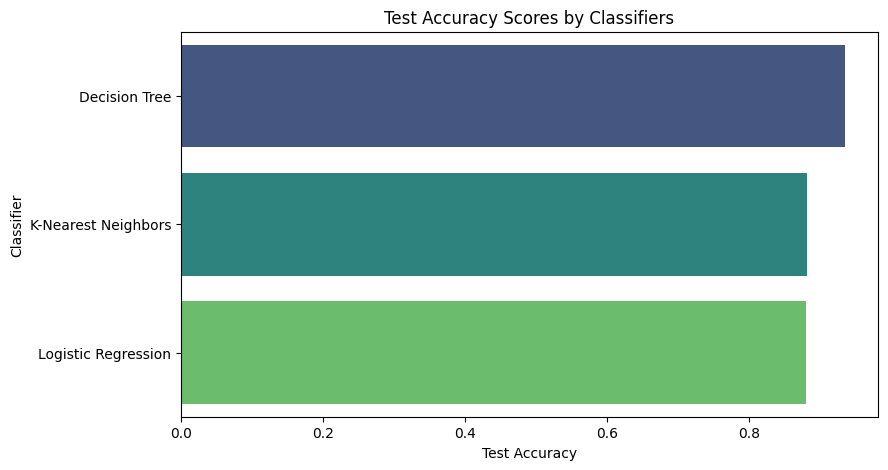

In [112]:
classifier_names = []
test_accuracy_scores = []
f1_scores = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    classifier_names.append(name)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_scores.append(test_accuracy)
data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': test_accuracy_scores})

# Sortiere das DataFrame nach  'Test Accuracy' in absteigender Reihenfolge
data = data.sort_values(by='Test Accuracy', ascending=False)

# Erstelle ein horizontales Balkendiagramm mit Seaborn
plt.figure(figsize=(9, 5))
ax = sns.barplot(data=data, x='Test Accuracy', y='Classifier', palette='viridis')
plt.title('Test Accuracy Scores by Classifiers')
plt.xlabel('Test Accuracy')
plt.ylabel('Classifier')
